In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings 

warnings.filterwarnings("ignore", category=UserWarning) 

%matplotlib inline

In [22]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\K-Means Clustering for Customer Segmentation\mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,19,16,33
1,2,Male,20,17,36
2,3,Female,21,18,39
3,4,Male,22,19,42
4,5,Female,23,20,45


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,39.500000,63.750000
std,57.879185,12.956343,14.467083,20.063655
min,1.000000,18.000000,15.000000,30.000000
25%,50.750000,28.000000,27.000000,46.750000
50%,100.500000,38.000000,39.500000,63.000000
75%,150.250000,50.000000,52.000000,81.000000
max,200.000000,62.000000,64.000000,99.000000


In [26]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,16,33
1,2,1,20,17,36
2,3,0,21,18,39
3,4,1,22,19,42
4,5,0,23,20,45


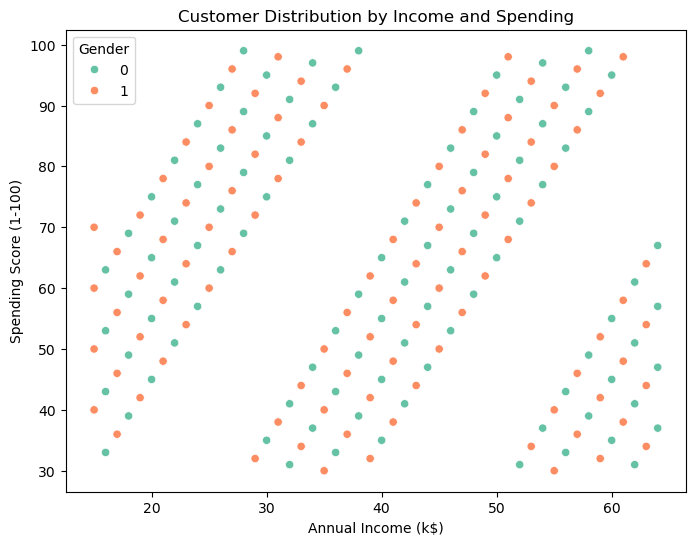

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="Set2")
plt.title("Customer Distribution by Income and Spending")
plt.show()

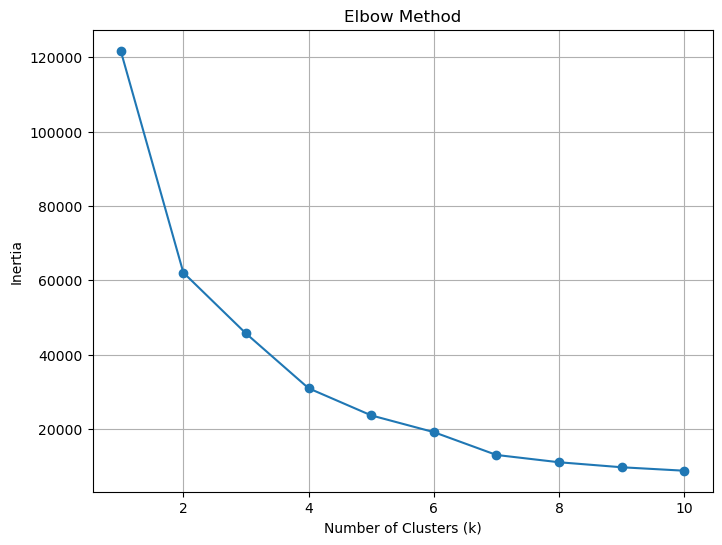

In [29]:
inertia = []
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,16,33,4
1,2,1,20,17,36,4
2,3,0,21,18,39,4
3,4,1,22,19,42,4
4,5,0,23,20,45,4


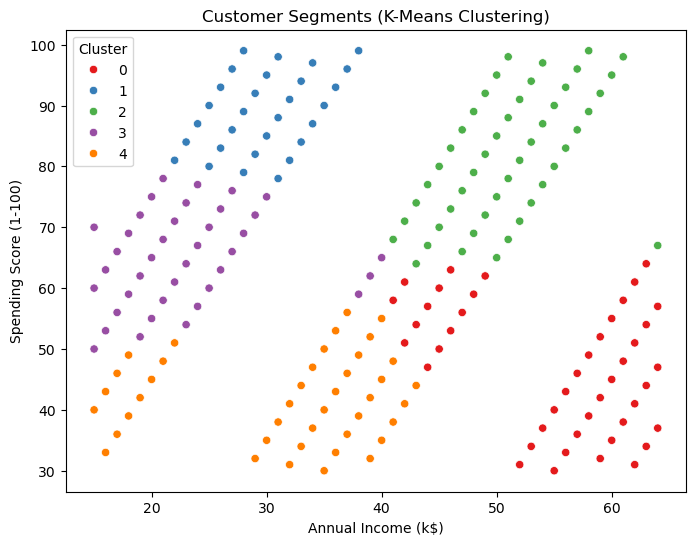

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1")
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()